In [59]:
from acquire_zillow import *
from acquire_mall import *
from prepare_mall import *
from prepare_zillow import *
import env


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# image stuff
from IPython.display import display
from PIL import Image

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2 as chi2
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from xgboost import XGBClassifier

from mpl_toolkits.mplot3d import Axes3D


# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

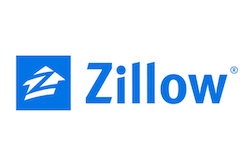

Detected zillow_data.csv - use csv (1) or gather new data (2)? 1
--- Beginning CSV Import --

--- CSV Import Complete --

Shape of DataFrame: (167854, 59)


In [2]:
df = single_units(acquire_zillow())

In [3]:
df = zillow_data_prep(df, cols_to_remove=[], prop_required_column=.95,
                      prop_required_row=.95)

Removing NAs, unnecessary columns, resetting index

In [4]:
remove_more_columns(df)

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,2931667,11016594,2.00,3.00,"1,684.00","34,280,990.00","-118,488,536.00","7,528.00","12,447.00","96,370.00","1,959.00","360,170.00","2,015.00","237,416.00","6,735.88",0.03,2016-01-01
1,2444575,12098116,3.00,2.00,"2,217.00","34,136,312.00","-118,175,032.00","11,423.00","47,019.00","96,293.00","1,940.00","119,906.00","2,015.00","57,912.00","11,484.48",-0.00,2016-01-01
2,2843942,11509835,4.00,4.00,"3,067.00","33,870,089.00","-118,402,768.00","2,708.00","29,712.00","96,109.00","1,982.00","2,447,951.00","2,015.00","1,567,301.00","27,126.57",-0.27,2016-01-02
3,1628001,12286022,1.00,2.00,"1,297.00","33,899,475.00","-118,212,720.00","6,677.00","24,174.00","96,091.00","1,939.00","111,521.00","2,015.00","46,972.00","2,304.97",0.04,2016-01-02
4,715639,10854446,2.00,2.00,"1,417.00","34,164,671.00","-118,477,995.00","8,279.00","12,447.00","96,426.00","1,954.00","105,954.00","2,015.00","50,558.00","1,443.69",0.38,2016-01-03
5,331651,11672170,4.00,5.00,"3,080.00","34,072,220.00","-118,547,322.00","7,052.00","12,447.00","96,120.00","1,995.00","1,090,127.00","2,015.00","531,087.00","13,428.94",-0.02,2016-01-03
6,1147246,10949761,2.00,3.00,"1,484.00","34,189,804.00","-118,339,183.00","8,214.00","396,054.00","96,437.00","1,944.00","70,119.00","2,015.00","40,568.00",832.35,0.03,2016-01-03
7,403163,10815909,3.00,3.00,"1,727.00","34,164,085.00","-118,528,595.00","6,171.00","12,447.00","96,379.00","1,950.00","416,279.00","2,015.00","307,294.00","5,194.00",0.01,2016-01-03
8,141379,12453853,1.00,2.00,840.00,"33,858,594.00","-118,188,672.00","4,444.00","46,298.00","96,239.00","1,927.00","260,249.00","2,015.00","137,297.00","3,211.31",-0.04,2016-01-03
9,2665140,11458863,4.00,3.00,"3,749.00","33,969,828.00","-118,396,647.00","10,926.00","12,447.00","96,026.00","1,952.00","1,194,279.00","2,015.00","874,830.00","14,747.98",0.12,2016-01-03


In [5]:
df.shape

(72930, 17)

Removing Outliers

In [6]:
keys = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet',
        'landtaxvaluedollarcnt', 'lotsizesquarefeet',
        'taxvaluedollarcnt', 'taxamount']
values = [(1,7), (1,7), (500,8000), (10000,2500000),
          (2500, 20000), (25000, 900000), (1000, 17000)]

dictionary = dict(zip(keys, values))

for key, value in dictionary.items():
    df = df[df[key] >= value[0]]
    df = df[df[key] <= value[1]]

In [7]:
df.shape

(56627, 17)

Standardizing nymeric columns

In [8]:
scaler = MinMaxScaler()
num_vars = list(df.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
df[num_vars] = scaler.fit_transform(df[num_vars])

Scaling id, parcelid, bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, latitude, longitude, lotsizesquarefeet, regionidcity, regionidzip, yearbuilt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, and logerror...


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


New dataframe to plot removing the unplottables

In [9]:
df2 = df.drop(columns=(['id', 'parcelid', 'regionidcity',
                        'assessmentyear', 'regionidzip',
                        'transactiondate']))

In [10]:
df2.shape

(56627, 11)

Heatmap

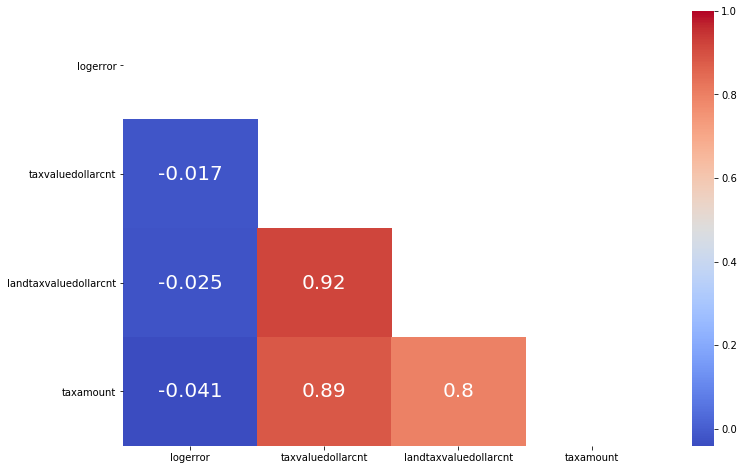

In [11]:
def heatmap_plot(cols):
    fig, ax = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(df2[cols].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df2[cols].corr(), annot=True, ax=ax, cmap='coolwarm',
                annot_kws={"size": 20}, mask=mask)
    ax.tick_params(labelsize=10)

heatmap_plot(['logerror', 'taxvaluedollarcnt',
                           'landtaxvaluedollarcnt', 'taxamount'])

In [12]:
df2.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude',
       'longitude', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror'],
      dtype='object')

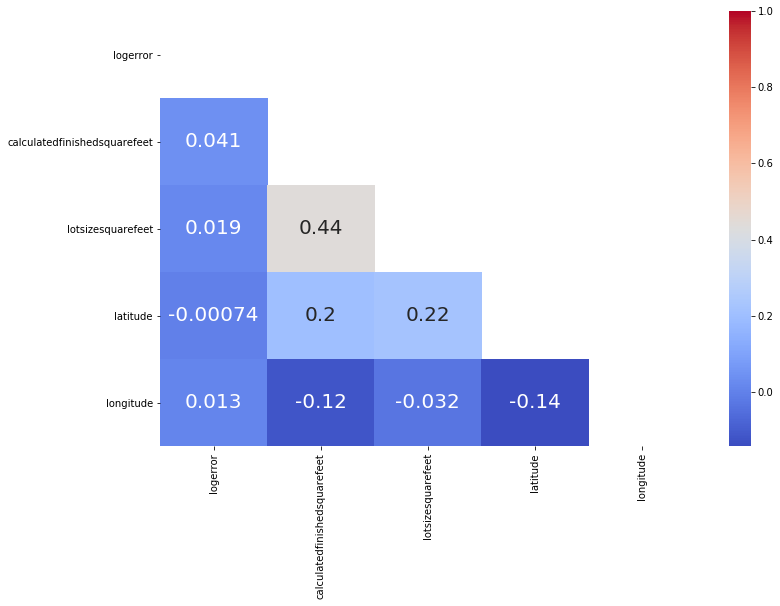

In [13]:
def heatmap_plot(cols):
    fig, ax = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(df2[cols].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df2[cols].corr(), annot=True, ax=ax, cmap='coolwarm',
                annot_kws={"size": 20}, mask=mask)
    ax.tick_params(labelsize=10)

heatmap_plot(['logerror', 'calculatedfinishedsquarefeet',
                           'lotsizesquarefeet', 'latitude', 'longitude'])

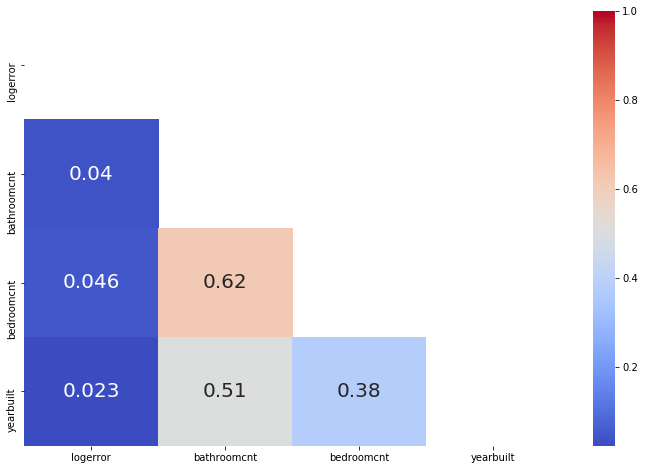

In [14]:
def heatmap_plot(cols):
    fig, ax = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(df2[cols].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df2[cols].corr(), annot=True, ax=ax, cmap='coolwarm',
                annot_kws={"size": 20}, mask=mask)
    ax.tick_params(labelsize=10)

heatmap_plot(['logerror', 'bathroomcnt',
                           'bedroomcnt', 'yearbuilt'])

Pairplot

In [ ]:
sns.pairplot(df2)

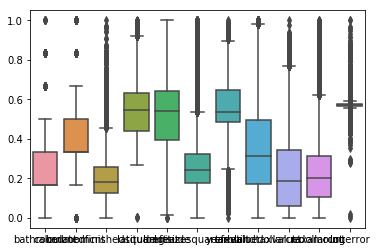

In [15]:
sns.boxplot(data=df2)

In [ ]:
sns.relplot(x='latitude', y='longitude',
            hue='logerror', data=df2)

In [ ]:
sns.relplot(x='taxamount', y='taxvaluedollarcnt',
            hue='logerror', data=df2)

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

kmeans.predict(df2)

array([2, 0, 0, ..., 1, 0, 2], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[0.10765411, 0.30593531, 0.14790553, 0.47880015, 0.57957652,
        0.2237999 , 0.48980375, 0.23687303, 0.1592214 , 0.1478631 ,
        0.57363354],
       [0.25119979, 0.43070477, 0.25625708, 0.77450213, 0.4808123 ,
        0.34803034, 0.70708123, 0.23557356, 0.08692203, 0.16337152,
        0.57394962],
       [0.22682932, 0.38892009, 0.25121202, 0.53362912, 0.4758618 ,
        0.30941448, 0.56526894, 0.64935823, 0.46040481, 0.40181046,
        0.57322674]])

In [18]:
pd.DataFrame(kmeans.cluster_centers_, columns=df2.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror
cluster,,,,,,,,,,,
0,0.11,0.31,0.15,0.48,0.58,0.22,0.49,0.24,0.16,0.15,0.57
1,0.25,0.43,0.26,0.77,0.48,0.35,0.71,0.24,0.09,0.16,0.57
2,0.23,0.39,0.25,0.53,0.48,0.31,0.57,0.65,0.46,0.40,0.57


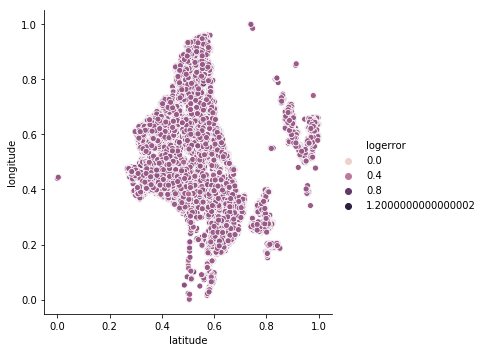

In [19]:
kmeans = KMeans(n_clusters=5).fit(df2)
df2['cluster'] = kmeans.predict(df2)
df2.cluster = 'cluster_' + (df2.cluster + 1).astype('str')
sns.relplot(data=df2, x='latitude', y='longitude', hue='logerror')

In [20]:
df2.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude',
       'longitude', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'cluster'],
      dtype='object')

   k                  sse
0  1            15,609.06
1  2            11,368.94
2  3             9,556.75
3  4             8,634.44
4  5             7,890.84
5  6             7,263.56
6  7             6,784.31
7  8             6,424.22
8  9             6,089.35


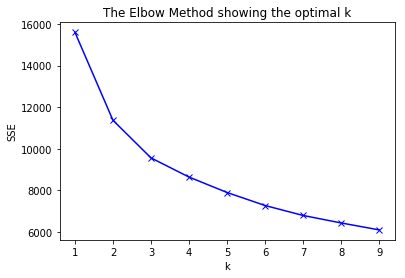

In [22]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2.drop(columns='cluster'))

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

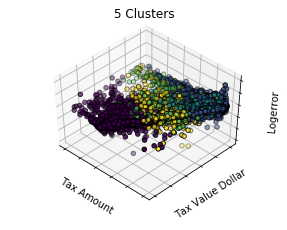

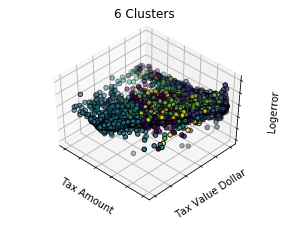

In [24]:
estimators = [('5 Clusters', KMeans(n_clusters=5)),
              ('6 Clusters', KMeans(n_clusters=6))]

for i, (title, kmeans) in enumerate(estimators):
    # fit the kmeans object
    kmeans.fit(df2.drop(columns='cluster'))

    fig = plt.figure(i + 1, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans.labels_

    ax.scatter(df2.taxamount, 
               df2.taxvaluedollarcnt, 
               df2.logerror,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Tax Amount')
    ax.set_ylabel('Tax Value Dollar')
    ax.set_zlabel('Logerror')
    ax.set_title(title)
    ax.dist = 12

In [25]:
df2['logerror_abs'] = df2.logerror.abs()

Binning Logerror

In [29]:
df2["logerror_bin_quart"] = pd.qcut(df2.logerror_abs, q=4)

Binning Bedrooms

In [40]:
bedroomcnt_bins = pd.IntervalIndex.from_tuples([(0, .2), (.2, .4),
                                                (.4, .6), (.6, 1)], closed="right")
df2["bedroomcnt_bin"] = pd.cut(df2.bedroomcnt, bins=bedroomcnt_bins)

Binning Bathrooms

In [44]:
bathroomcnt_bins = pd.IntervalIndex.from_tuples([(0, .2), (.2, .4),
                                                (.4, .6), (.6, 1)], closed="right")
df2["bathroomcnt_bin"] = pd.cut(df2.bathroomcnt, bins=bathroomcnt_bins)

Binning Tax Value and Tax Amount

In [52]:
taxvalue_bins = pd.IntervalIndex.from_tuples([(0, .2), (.2, .4),
                                                (.4, .6), (.6, 1)], closed="right")
df2["tax_value_bins"] = pd.cut(df2.taxamount, bins=taxvalue_bins)


taxvaluedollar_bins = pd.IntervalIndex.from_tuples([(0, .2), (.2, .4),
                                                (.4, .6), (.6, 1)], closed="right")
df2["tax_value_dollar_bins"] = pd.cut(df2.taxvaluedollarcnt, bins=taxvaluedollar_bins)



In [57]:
df2.xcols = ["yearbuilt", "bathroomcnt", "bedroomcnt",
             "taxvaluedollarcnt", "calculatedfinishedsquarefeet"]
df2.ycols = 'logerror_abs'

X_train, X_test, y_train, y_test = train_test_split(df2[df2.xcols],
                                                    df2[[df2.ycols]], test_size = .3, random_state=777)

In [60]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['yearbuilt', 'bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'logerror_abs']
Train dimensions (rows, columns): (39638, 6)


In [61]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['yearbuilt', 'bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'logerror_abs']
Test dimensions (rows, columns): (16989, 6)


In [62]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.70
Test Split: 0.30


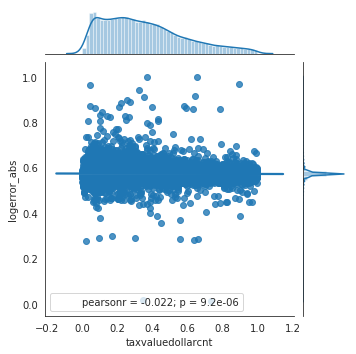

In [64]:
with sns.axes_style('white'):
    j = sns.jointplot("taxvaluedollarcnt", "logerror_abs", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()


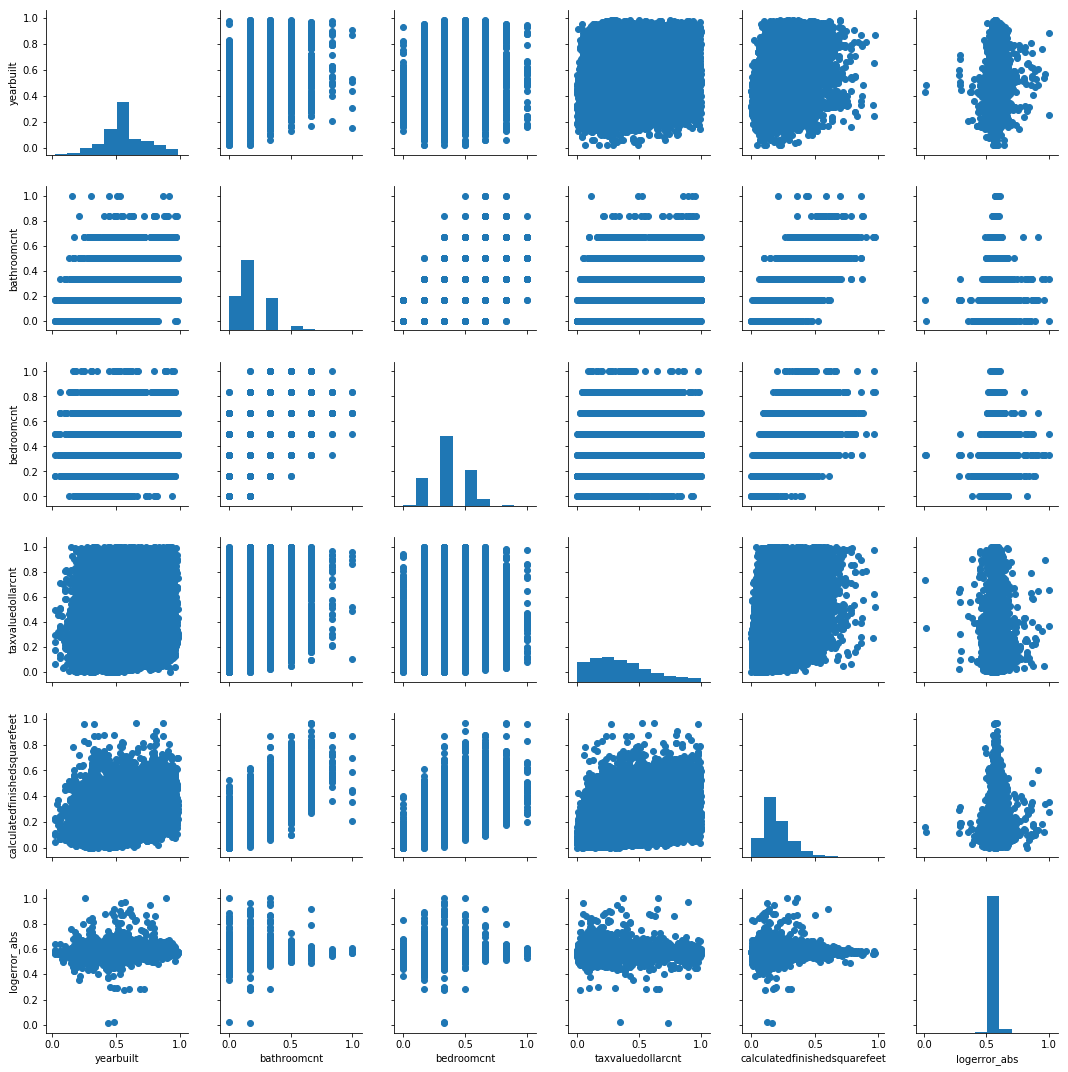

In [65]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

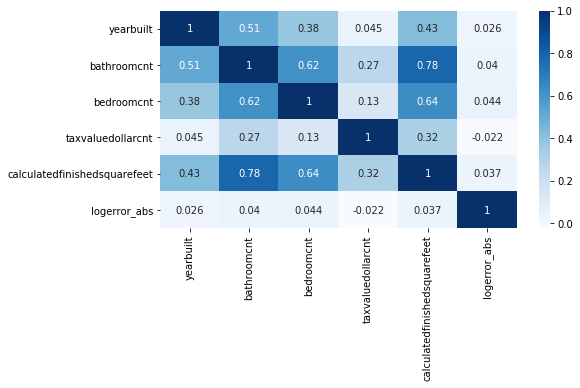

In [66]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [68]:
from scipy.stats import pearsonr
pearsonr(X_train[['bedroomcnt']], y_train)

(array([0.0444311]), array([8.75113246e-19]))

In [70]:
[[column, pearsonr(train[column], train.logerror_abs)] for column in X_train] 

[['yearbuilt', (0.026275250985901343, 1.677263302193255e-07)],
 ['bathroomcnt', (0.03994007537465093, 1.7955124548012684e-15)],
 ['bedroomcnt', (0.04443110193656394, 8.751132459358408e-19)],
 ['taxvaluedollarcnt', (-0.022273143774856903, 9.21424030905697e-06)],
 ['calculatedfinishedsquarefeet',
  (0.03740636376362599, 9.354191129983674e-14)]]

In [71]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logerror_abs   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.479e+05
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:32:56   Log-Likelihood:                 24805.
No. Observations:               39638   AIC:                        -4.960e+04
Df Residuals:                   39633   BIC:                        -4.956e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
yearbuilt                        0.6786      0.003    208.152      0.000       0.672       0.685
bathroomcnt                     -0.6218      0.008    -78.664      0.000      -0.637      -0.606
bedroomcnt                       0.4889      0.006     85.965      0.000       0.478       0.500
taxvaluedollarcnt                0.2083      0.003     73.699      0.000       0.203       0.214
calculatedfinishedsquarefeet     0.1090      0.010     10.818      0.000       0.089       0.129
==============================================================================
Omnibus:                      148.305   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.219
Skew:                          -0.105   Prob(JB):                     4.88e-37
Kurtosis:                       3.240   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lm2 = LinearRegression()

In [74]:
X_train.columns

Index(['yearbuilt', 'bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt',
       'calculatedfinishedsquarefeet'],
      dtype='object')

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 72522 to 61612
Data columns (total 5 columns):
yearbuilt                       39638 non-null float64
bathroomcnt                     39638 non-null float64
bedroomcnt                      39638 non-null float64
taxvaluedollarcnt               39638 non-null float64
calculatedfinishedsquarefeet    39638 non-null float64
dtypes: float64(5)
memory usage: 3.1 MB


In [79]:
lm2.fit(X_train.drop(columns='yearbuilt'), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[0.57232673]
[[ 0.00295094  0.00344156 -0.00295118  0.00260536]]


In [82]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['yearbuilt']))

In [83]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 0.000344


In [84]:
r2_lm2 = r2_score(y_train, y_pred_lm2)

In [85]:
print('  {:.2%} of the variance in logerror can be explained by the features sans yearbuilt'.format(r2_lm2))

  0.34% of the variance in logerror can be explained by the features sans yearbuilt
